# DAWN Winter School 2022 
### - Spectral Analysis Tools Tutorial

This tutorial will show and provide the basics of analyzing and extracting physical properties from astronomical spectra. In this example, we will first work with a VIS arm spectrum from the X-shooter echelle spectrograch at the ESO Very Large Telescope in Chile of the host galaxy of the gamma-ray burst (GRB) 031203.
This tutorial will mostly rely on the specutils (cite) module available in Python, but other tools also exist:
- List 1
- list 2 

Some of these allow more quick view-and-analysis of the data with interactive GUIs, but for the sake of transparancy this tutorial shows all the necessary steps involved in basic spectroscopic analysis. 
Focus on (host) galaxy spectrum -- Include absorption-based spectrum as well? Perhaps simple EW fitting?

In [35]:
# Load in the necessary basic modules 
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# Load in the relevant specutils functionalities
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_generic_continuum

(-1e-17, 1e-16)

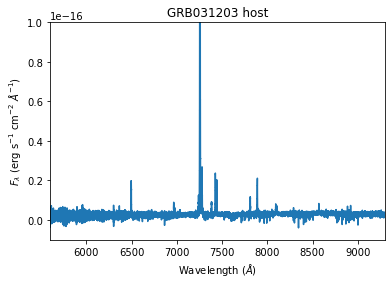

In [36]:
# First, we need to read in the spectroscopic data
dat = np.genfromtxt('HG031203_VIS.txt')
wave = dat[:,0] * u.AA  # First data column is the wavelength of the spectrum in units of Ångstrom (Å)
flux = dat[:,1] * u.Unit('erg s-1 cm-2 AA-1')# Second data column is the flux density in unis of erg s^-1 cm^-2 Å^-1 

# We can then plot the spectrum
plt.step(wave,flux)
# Setting title and axis labels
plt.title('GRB031203 host')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
# With sensible x and y ranges
plt.xlim(5600,9300)
plt.ylim(-0.1e-16,1e-16)

(-1e-17, 1e-16)

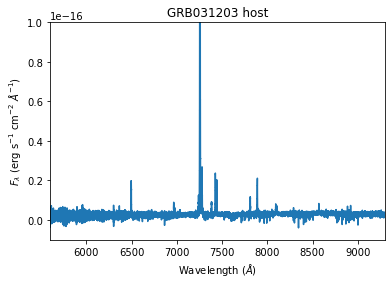

In [37]:
# Then for the sake of this exercise we need to re-format this dataset and create a Spectrum1D object
spec = Spectrum1D(spectral_axis=wave, flux=flux)
# Which we can also use to plot the spectrum following their format
plt.step(spec.spectral_axis, spec.flux) 

# Setting the same title and axis labels
plt.title('GRB031203 host')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
# With sensible x and y ranges
plt.xlim(5600,9300)
plt.ylim(-0.1e-16,1e-16)

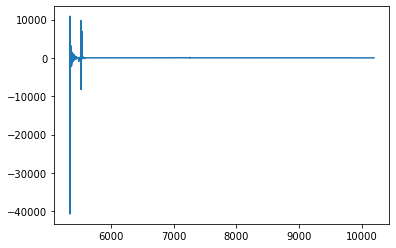

In [42]:
# As a first attempt in analyzing this spectrum we can normalize it by fitting a model to the continuum flux
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 
# Plot the normalized spectrum
plt.step(cont_norm_spec.wavelength, cont_norm_spec.flux)  
